<a href="https://colab.research.google.com/github/JChengecha/house_price_listing/blob/main/House_Pricing_Team_Bounty_Hunters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Exploratory Data Analysis and documentation

## a. Specifying the data analytic question


Recent studies have indicated that based on location, there is a disparity in house prices. The purpose of the study will be to find a commendable house location based on a person’s budget and come up with a hypothesis on the house cost within the most common regions in the USA.

Ho: There is no significant difference in the average price of an apartment and a house 

H1:The average price of an apartment is significatnly lower than that of a house (claim)


## b. Defining the metrics for success



*  Univariate analysis
*  Bivariate analysis
*  Hypothesis testing
*  Tableau Visualization






## c. Understanding the context


We will perform a background search to understand the data including studying the data set attributes for proper planning of the analysis.

## d. Recording the experimental design

The EDA process will involve:

*   data understanding
*   data cleaning (anomalies, missing values, outliers)
*   data analysis(univariate,bivariate)
*   hypothesis testing and reporting

Data Visualization will be done using tableau accompanied by a data report in a google doc format.





## e. Data relevance.

Cross-check whether is relevant to the topic of study and adequate enough to answer the research question.

# 2.0 Importing libraries to be used

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 3.0 Loading the data and previewing


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/housing.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

## 3.1 Data cleaning

In [ ]:
df.drop(columns=['url','region_url','image_url','description'],axis=1,inplace=True)

## a. Dropping columns
The columns dropped were:
* url
* region_url
* image_url
* description

## b.Renaming the columns


In [ ]:
df.rename(columns={"beds":"number_of_bedrooms", "baths":"number_of_bathrooms","lat":"latitude","long":"longitude"},inplace=True)

In [ ]:
df.columns

Index(['id', 'region', 'price', 'type', 'sqfeet', 'number_of_bedrooms',
       'number_of_bathrooms', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'laundry_options', 'parking_options', 'latitude',
       'longitude', 'state'],
      dtype='object')

Converting the column for the number of bathrooms to data type int since it was float

In [ ]:
df['number_of_bathrooms']=np.int64(df['number_of_bathrooms'])

## c.checking for null values and dealing with them

In [ ]:
df.isnull().sum()

id                              0
region                          0
price                           0
type                            0
sqfeet                          0
number_of_bedrooms              0
number_of_bathrooms             0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
latitude                     1918
longitude                    1918
state                           0
dtype: int64

In [ ]:
df.dropna(inplace=True)

* we decided dropping the null values because filling in the null values would not accrue accurate results/analysis

In [ ]:
df.isnull().sum()

id                         0
region                     0
price                      0
type                       0
sqfeet                     0
number_of_bedrooms         0
number_of_bathrooms        0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
latitude                   0
longitude                  0
state                      0
dtype: int64

## d.checking for duplicates

In [ ]:
df.duplicated().sum()

0

the state column had abbreviations, therefore to easily identify, we had to change each abbreviations to their full names 

In [ ]:
df.replace({'state': {'ca':'California', 'co':'Colorado', 'ct':'Connecticut', 'fl':'Florida', 'de':'Delaware', 'ga':'Georgia', 'hi':'Hawaii', 'id':'Idaho', 'il':'Illinois', 'in':'Indiana',
       'ia':'Iowa', 'ks':'Kansas', 'ky':'Kentucky', 'la':'Louisiana', 'me':'Maine', 'md':'Maryland', 'ma':'Massachusetts', 'mi':'Michigan', 'mn': 'Minnesota', 'ms':'Mississippi', 'nc':'North Carolina',
       'mo': 'Missouri', 'mt':'Montana', 'ne':'Nebraska', 'nv':'Nevada', 'nj':'New Jersey', 'nm':'New Mexico', 'ny':'New York', 'nh':'New Hampshire', 'oh':'Ohio', 'nd':'North Dakota', 'ok':'Oklahoma',
       'or':'Oregon', 'pa':'Pennsylvania', 'ri':'Rhode Island', 'sc':'South Carolina', 'tn':'Tennessee', 'sd':'South Dakota', 'tx':'Texas', 'ut':'Utah', 'va':'Virginia', 'vt':'Vermont', 'wa':'Washington',
       'wv':'West Virginia', 'wi':'Wisconsin', 'wy':'Wyoming', 'al':'Alabama', 'ak':'Alaska', 'az':'Arizona', 'ar':'Arkansas','dc':'District of Columbia'}},inplace=True)


In [ ]:
df['state'].unique()

array(['California', 'Colorado', 'Connecticut', 'District of Columbia',
       'Florida', 'Delaware', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'North Carolina', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Jersey', 'New Mexico', 'New York', 'New Hampshire',
       'Ohio', 'North Dakota', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'Tennessee', 'South Dakota',
       'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Alabama', 'Alaska',
       'Arizona', 'Arkansas'], dtype=object)

In [ ]:
df.head()

,id,region,price,type,sqfeet,number_of_bedrooms,number_of_bathrooms,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,latitude,longitude,state
0,7049044568,reno / tahoe,1148,apartment,1078,3,2,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,California
1,7049047186,reno / tahoe,1200,condo,1001,2,2,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,California
2,7043634882,reno / tahoe,1813,apartment,1683,2,2,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,California
3,7049045324,reno / tahoe,1095,apartment,708,1,1,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,California
6,7049020738,reno / tahoe,935,apartment,661,1,1,1,1,1,0,0,0,laundry on site,off-street parking,39.5118,-119.802,California


## e.Checking for outliers and anomalies


We will remove outliers for the price column using the interquantile range scores

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


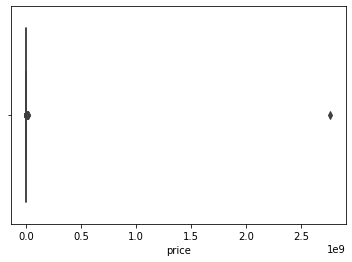

In [ ]:
sns.boxplot(df['price'])


In [ ]:
Q1 = df[['price']].quantile(q=.25)
Q3 = df[['price']].quantile(q=.75)
IQR = df[['price']].apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


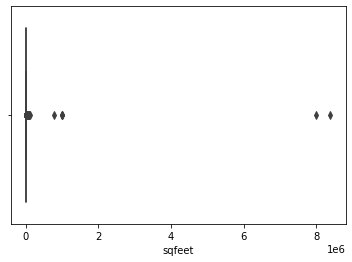

In [ ]:
sns.boxplot(df['sqfeet'])

In [ ]:
Q1 = df[['sqfeet']].quantile(q=.25)
Q3 = df[['sqfeet']].quantile(q=.75)
IQR = df[['sqfeet']].apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


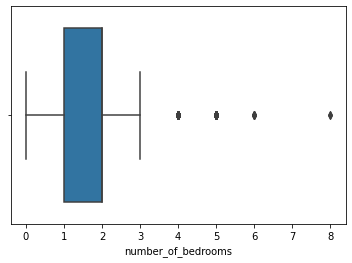

In [ ]:
sns.boxplot(df['number_of_bedrooms'])

In [ ]:
Q1 = df[['number_of_bedrooms']].quantile(q=.25)
Q3 = df[['number_of_bedrooms']].quantile(q=.75)
IQR = df[['number_of_bedrooms']].apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


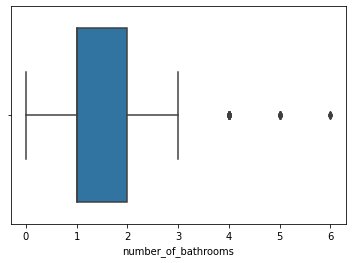

In [ ]:
sns.boxplot(df['number_of_bathrooms'])

In [ ]:
Q1 = df[['number_of_bathrooms']].quantile(q=.25)
Q3 = df[['number_of_bathrooms']].quantile(q=.75)
IQR = df[['number_of_bathrooms']].apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

exporting the clean dataset for visualizations in tableau

In [ ]:
df.to_csv('clean_housing_dataset.csv',index=False)

# 4.0 Univariate analysis

## a.Frequency tables

In [ ]:
print('Top Ten most popular settelment by regions\n',df['region'].value_counts().head(10),'\n\n')
print('Top Ten least popular settelment by regions\n',df['region'].value_counts(ascending=True).head(10),'\n\n')
print('Top Ten most popular settelment by State\n',df['state'].value_counts().head(10),'\n\n')
print('Top Ten least popular settelment by State\n',df['state'].value_counts(ascending=True).head(10),'\n\n')
print('List of  popular laundry options\n',df['laundry_options'].value_counts(),'\n\n')
print('List of popular parking options available\n',df['parking_options'].value_counts(),'\n\n')
print('List of the popular house type\n',df['type'].value_counts(),'\n\n')


Top Ten most popular settelment by regions
 rochester                 2614
jacksonville              2447
columbus                  2071
omaha / council bluffs    1980
jackson                   1894
minneapolis / st paul     1796
lincoln                   1782
portland                  1760
st louis, MO              1757
sacramento                1753
Name: region, dtype: int64 


Top Ten least popular settelment by regions
 fort smith, AR    1
kansas city       3
southwest TX      3
southwest MS      3
southwest VA      5
owensboro         6
st louis          7
susanville        7
kirksville        7
mason city        9
Name: region, dtype: int64 


Top Ten most popular settelment by State
 California        18706
Texas             14341
Florida           13428
Michigan           9197
Ohio               8767
North Carolina     8400
Georgia            6414
New York           6172
Oregon             6028
Illinois           5991
Name: state, dtype: int64 


Top Ten least popular settelme

Some observations made:
* The most popular type of housing were the apartments, followed closely by town house and condos came in third place.

* The ten most popular settlement locations by state were : California, Texas, Florida, Michigan, Ohio, North Carolina, Georgia, New York, Oregon and illinois.
 
* The most popular type of parking was off street parking with carport and attached garage falling in second and third places consecutively.



## b. Barcharts

We will be checking on house prices based on the consumers background and lifestyle

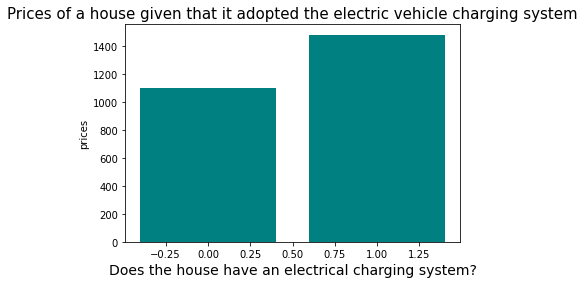

In [ ]:
wheelchairaccess_by_type=df.groupby(df['electric_vehicle_charge'],as_index=False)['price'].mean()
plt.bar(wheelchairaccess_by_type['electric_vehicle_charge'],wheelchairaccess_by_type['price'], color='teal')
plt.title('Prices of a house given that it adopted the electric vehicle charging system',fontsize=15)
plt.xlabel('Does the house have an electrical charging system?',fontsize=14)
plt.ylabel('prices')
plt.show()

Houses that offer electric vehicle charging system have higher prices 

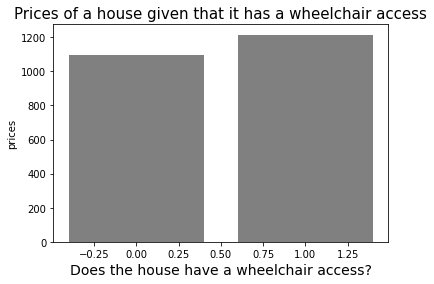

In [ ]:

wheelchairaccess_by_type=df.groupby(df['wheelchair_access'],as_index=False)['price'].mean()
plt.bar(wheelchairaccess_by_type['wheelchair_access'],wheelchairaccess_by_type['price'], color='grey')
plt.title('Prices of a house given that it has a wheelchair access',fontsize=15)
plt.xlabel('Does the house have a wheelchair access?',fontsize=14)
plt.ylabel('prices')
plt.show()

There is a higher chance an individual will pay higher price for a house which has a wheelchair access

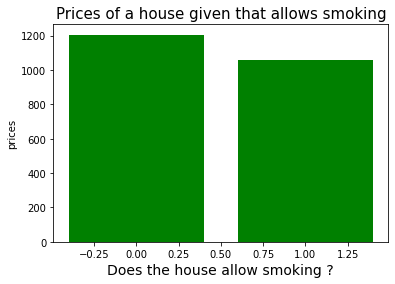

In [ ]:
wheelchairaccess_by_type=df.groupby(df['smoking_allowed'],as_index=False)['price'].mean()
plt.bar(wheelchairaccess_by_type['smoking_allowed'],wheelchairaccess_by_type['price'], color='green')
plt.title('Prices of a house given that allows smoking',fontsize=15)
plt.xlabel('Does the house allow smoking ?',fontsize=14)
plt.ylabel('prices')
plt.show()

Prices for houses that dont allow smoking were higher prices as compared to houses which do not allow smoking.

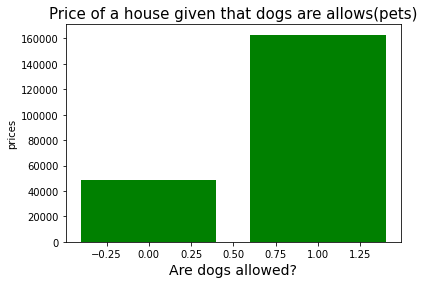

In [ ]:
dogs_by_type=df.groupby(df['dogs_allowed'],as_index=False)['sqfeet'].count()
plt.bar(dogs_by_type['dogs_allowed'],dogs_by_type['sqfeet'], color='green')
plt.title('Price of a house given that dogs are allows(pets)',fontsize=15)
plt.xlabel('Are dogs allowed?',fontsize=14)
plt.ylabel('prices')
plt.show()

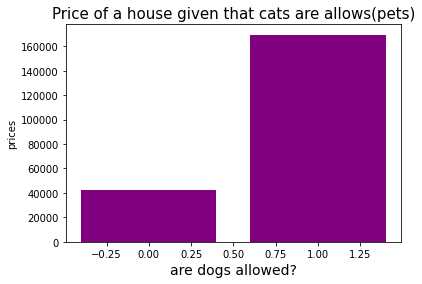

In [ ]:
dogs_by_type=df.groupby(df['cats_allowed'],as_index=False)['sqfeet'].count()
plt.bar(dogs_by_type['cats_allowed'],dogs_by_type['sqfeet'], color='purple')
plt.title('Price of a house given that cats are allows(pets)',fontsize=15)
plt.xlabel('are dogs allowed?',fontsize=14)
plt.ylabel('prices')
plt.show()

Generally,home owners who have pets do pay higher prices for a house than the home owners who do not.

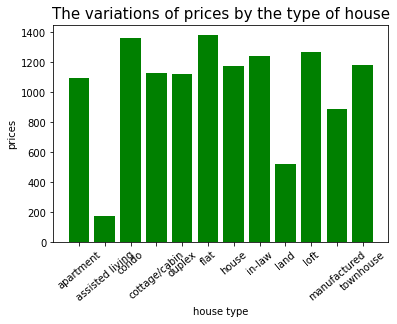

In [ ]:
# A bar chart showing relationship between house type and price.
house_by_type=df.groupby(df['type'],as_index=False)['price'].mean()
plt.bar(house_by_type['type'],house_by_type['price'], color='green')


plt.title('The variations of prices by the type of house',fontsize=15)
plt.xlabel('house type')
plt.xticks(rotation=40)
plt.ylabel('prices')
plt.show()

On average, an individual is likely to pay higher living in a condo or flat.

Also, the price of a townhouse is slighty higher than of a cottage/cabin and a duplex 

Assisted living offers the least price across the States

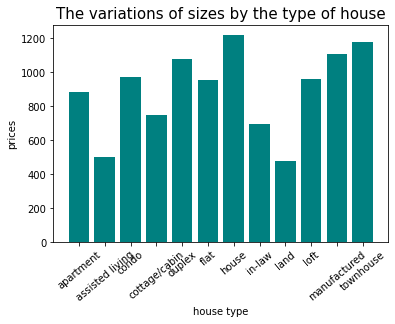

In [ ]:
house_by_type=df.groupby(df['type'],as_index=False)['sqfeet'].mean()
plt.bar(house_by_type['type'],house_by_type['sqfeet'], color='teal')


plt.title('The variations of sizes by the type of house',fontsize=15)
plt.xlabel('house type')
plt.xticks(rotation=40)
plt.ylabel('prices')
plt.show()

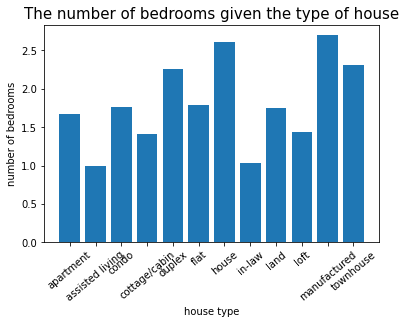

In [ ]:
house_by_type=df.groupby(df['type'],as_index=False)['number_of_bedrooms'].mean()
plt.bar(house_by_type['type'],house_by_type['number_of_bedrooms'],)
plt.title('The number of bedrooms given the type of house',fontsize=15)
plt.xlabel('house type')
plt.xticks(rotation=40)
plt.ylabel('number of bedrooms')
plt.show()

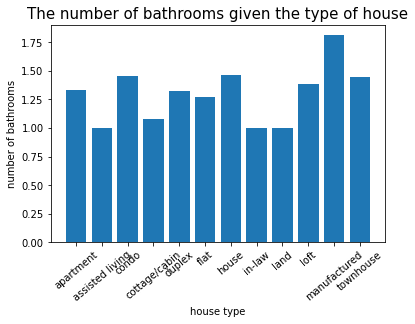

In [ ]:
house_by_type=df.groupby(df['type'],as_index=False)['number_of_bathrooms'].mean()
plt.bar(house_by_type['type'],house_by_type['number_of_bathrooms'],)
plt.title('The number of bathrooms given the type of house',fontsize=15)
plt.xlabel('house type')
plt.xticks(rotation=40)
plt.ylabel('number of bathrooms')
plt.show()

a manufatcured house has more number of bathrooms and bedrooms as compared to any other type of house

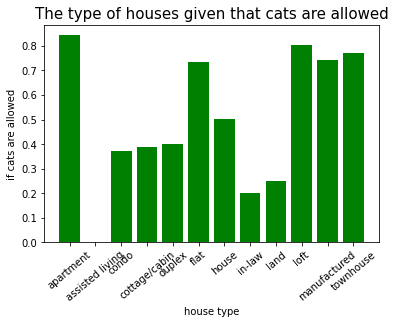

In [ ]:
house_by_type=df.groupby(df['type'],as_index=False)['cats_allowed'].mean()
plt.bar(house_by_type['type'],house_by_type['cats_allowed'], color='green')
plt.title('The type of houses given that cats are allowed',fontsize=15)
plt.xlabel('house type')
plt.xticks(rotation=40)
plt.ylabel('if cats are allowed')
plt.show()

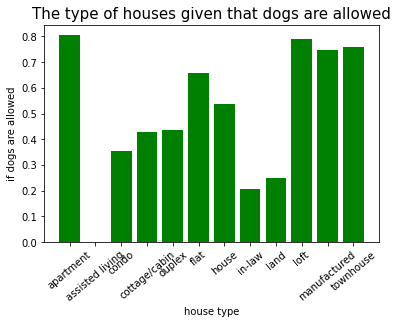

In [ ]:
house_by_type=df.groupby(df['type'],as_index=False)['dogs_allowed'].mean()
plt.bar(house_by_type['type'],house_by_type['dogs_allowed'], color='green')
plt.title('The type of houses given that dogs are allowed',fontsize=15)
plt.xlabel('house type')
plt.xticks(rotation=40)
plt.ylabel('if dogs are allowed')
plt.show()

Apartments were the type of housing with the highest score for allowing cats followed closely by town house and flats consecutively.

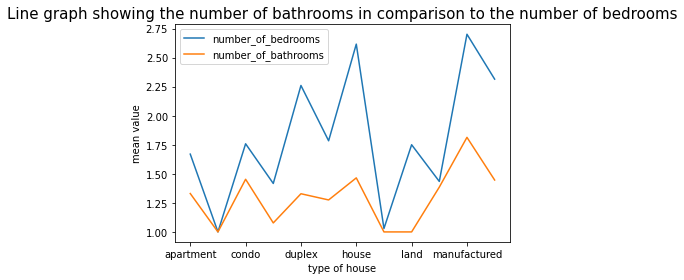

In [ ]:
a=df.groupby(df['type'])[['number_of_bedrooms','number_of_bathrooms']].mean()
a[['number_of_bedrooms','number_of_bathrooms']].plot()
plt.title('Line graph showing the number of bathrooms in comparison to the number of bedrooms',fontsize=15)
plt.xlabel('type of house')
plt.ylabel('mean value')
plt.show()

A duplex and a house seemingly offer more shared bathrooms as compared to the bedrooms





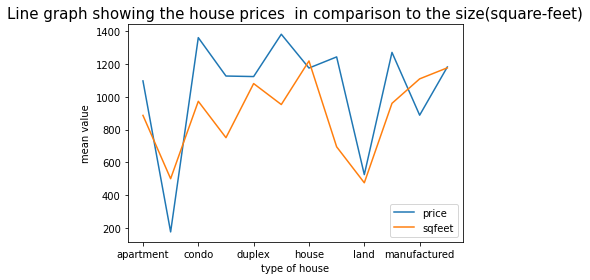

In [ ]:
a=df.groupby(df['type'])[['price','sqfeet']].mean()
a[['price','sqfeet']].plot()
plt.title('Line graph showing the house prices  in comparison to the size(square-feet)',fontsize=15)
plt.xlabel('type of house')
plt.ylabel('mean value')
plt.show()

It makes sense that for assisted living the price of a house would be less than the space offered

## c. Piecharts

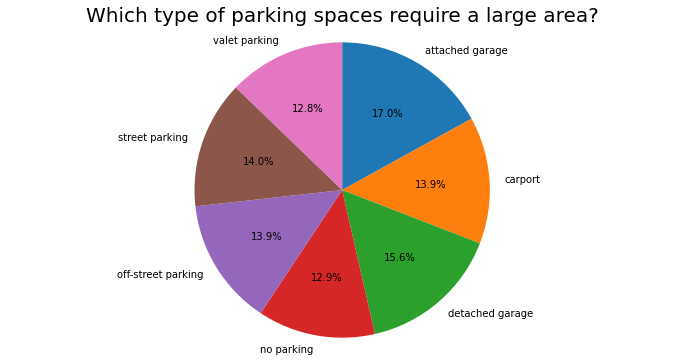

In [ ]:
parkingdf=df.groupby(df['parking_options'],as_index=False)['sqfeet'].mean()
plt.figure(figsize=(12, 6))
plt.pie(parkingdf.sqfeet,labels=parkingdf['parking_options'], autopct='%1.1f%%',startangle=90,counterclock=False)
plt.title('Which type of parking spaces require a large area?',fontsize=20)
plt.axis('equal')
plt.show()

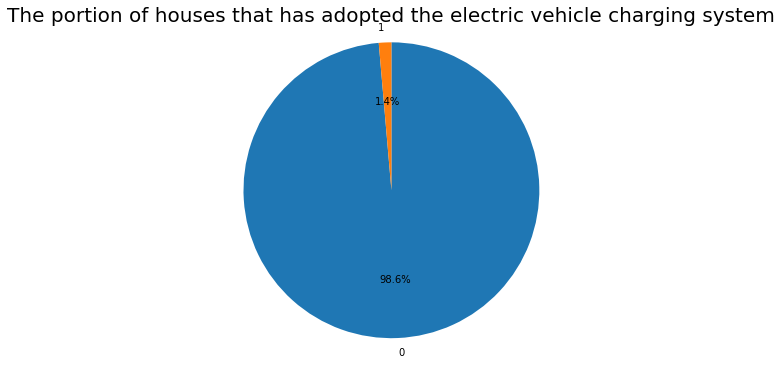

In [ ]:
wheeldf=df.groupby(df['electric_vehicle_charge'],as_index=False)['region'].count()
plt.figure(figsize=(12, 6))
plt.pie(wheeldf['region'],labels=wheeldf['electric_vehicle_charge'], autopct='%1.1f%%',startangle=90,counterclock=False)
plt.title('The portion of houses that has adopted the electric vehicle charging system',fontsize=20)
plt.axis('equal')
plt.show()

Across all States, less than 2% of the houses have adopted the electric vehicle charging system

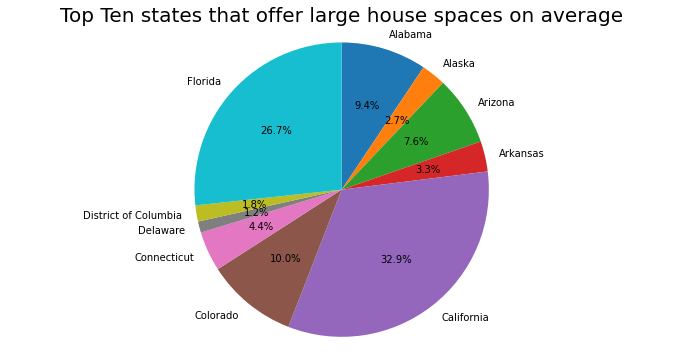

In [ ]:
parkingdf=df.groupby(df['state'],as_index=False)['sqfeet'].sum().head(10)
parkingdf
plt.figure(figsize=(12, 6))
plt.pie(parkingdf.sqfeet,labels=parkingdf['state'], autopct='%1.1f%%',startangle=90,counterclock=False)
plt.title('Top Ten states that offer large house spaces on average',fontsize=20)
plt.axis('equal')
plt.show()

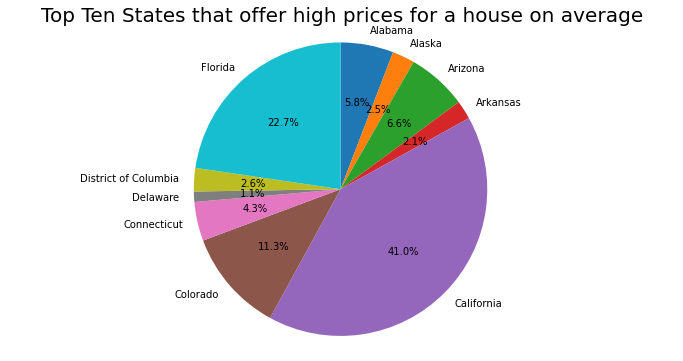

In [ ]:
parkingdf=df.groupby(df['state'],as_index=False)['price'].sum().head(10)
parkingdf
plt.figure(figsize=(12, 6))
plt.pie(parkingdf.price,labels=parkingdf['state'], autopct='%1.1f%%',startangle=90,counterclock=False)
plt.title('Top Ten States that offer high prices for a house on average',fontsize=20)
plt.axis('equal')
plt.show()

In [ ]:
df.columns

Index(['id', 'region', 'price', 'type', 'sqfeet', 'number_of_bedrooms',
       'number_of_bathrooms', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'laundry_options', 'parking_options', 'latitude',
       'longitude', 'state'],
      dtype='object')

In [ ]:
df[['price','sqfeet']].describe()

,price,sqfeet
count,211855.000000,211855.000000
mean,1109.299384,929.698459
std,420.532179,268.610145
min,0.000000,174.000000
25%,800.000000,736.000000
50%,1010.000000,915.000000
75%,1360.000000,1100.000000
max,2431.000000,1712.000000


# 5.0 Bivariate analysis

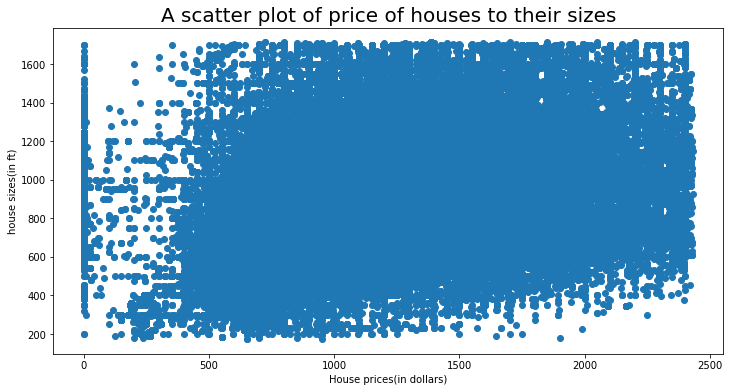

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['price'], df['sqfeet'])
plt.title('A scatter plot of price of houses to their sizes',fontsize=20)
plt.xlabel('House prices(in dollars)')
plt.ylabel('house sizes(in ft)')
plt.show()

The scatter plot indicate a positive weak positive correlation between price and the floor size of a house

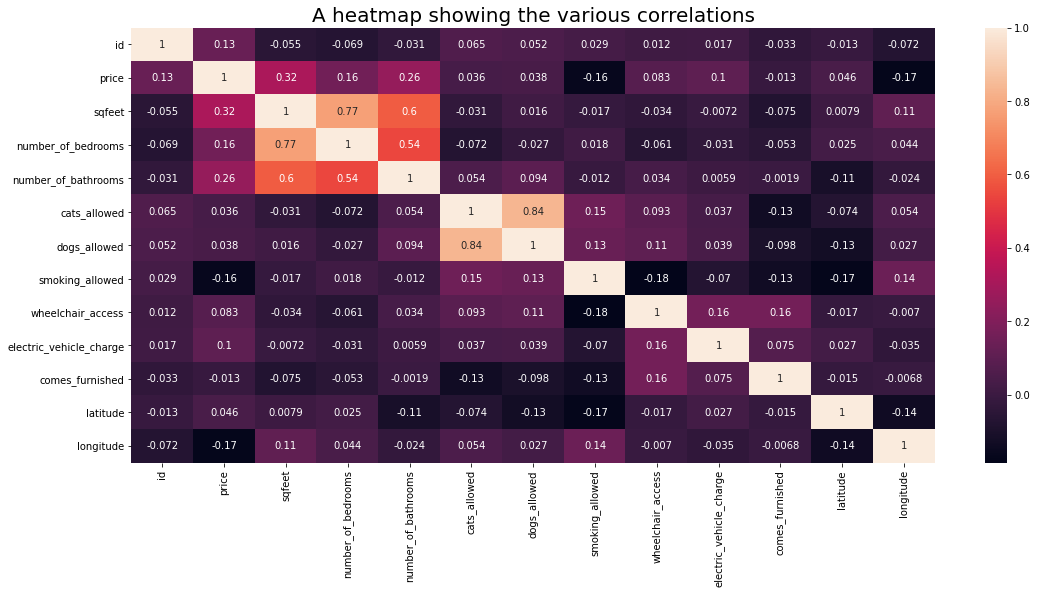

In [ ]:
plt.figure(figsize=(18, 8))

housing_corr = df.corr()
sns.heatmap(housing_corr, 
            xticklabels = housing_corr.columns.values,
            yticklabels = housing_corr.columns.values,
            annot = True)
plt.title('A heatmap showing the various correlations',fontsize=20)
plt.show()


*   There was weak positive correlation(0.32) between the size of the house(Sqfeet) and their prices.
*  A weak positive correlation was also observed between the price of the houses and the number of bathrooms/bedrooms.







In [ ]:
!pip install -q researchpy
import researchpy as rp
rp.summary_cont(df.groupby("type")['price'])
#
# flats were the most priced type of housing with an average cost of $ 1382. condo came in second with an average price of $ 1361
# followed closely by loft with an average price of $ 1271.

,N,Mean,SD,SE,95% Conf.,Interval
type,,,,,,
apartment,175759,1097.2930,417.9552,0.9969,1095.3390,1099.2470
assisted living,1,175.0000,NaN,NaN,NaN,NaN
condo,3925,1361.5259,466.8960,7.4525,1346.9148,1376.1369
cottage/cabin,530,1127.0340,450.9089,19.5862,1088.5576,1165.5103
duplex,3870,1123.8186,403.7475,6.4901,1111.0942,1136.5430
flat,389,1382.2494,495.6904,25.1325,1332.8364,1431.6623
house,12339,1175.7998,430.9602,3.8797,1168.1950,1183.4046
in-law,136,1243.8235,449.9167,38.5800,1167.5241,1320.1230
land,4,525.0000,165.8312,82.9156,261.1255,788.8745


In [ ]:
rp.summary_cont(df.groupby("type")['sqfeet'])


,N,Mean,SD,SE,95% Conf.,Interval
type,,,,,,
apartment,175759,886.7148,243.5299,0.5809,885.5762,887.8533
assisted living,1,500.0000,NaN,NaN,NaN,NaN
condo,3925,972.7929,294.1245,4.6947,963.5885,981.9972
cottage/cabin,530,750.5528,290.9901,12.6398,725.7225,775.3832
duplex,3870,1081.0129,273.7401,4.4003,1072.3858,1089.6401
flat,389,952.9537,301.8335,15.3036,922.8654,983.0420
house,12339,1219.1272,283.2577,2.5500,1214.1288,1224.1257
in-law,136,694.7868,282.2230,24.2004,646.9258,742.6478
land,4,475.0000,287.2281,143.6141,17.9559,932.0441


# 6.0 Multivariate Analysis

In [ ]:
#we first make a copy of the original data frame for label encoding
df1=df.copy()
df1

,id,region,price,type,sqfeet,number_of_bedrooms,number_of_bathrooms,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,latitude,longitude,state
0,7049044568,reno / tahoe,1148,apartment,1078,3,2,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,California
1,7049047186,reno / tahoe,1200,condo,1001,2,2,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,California
2,7043634882,reno / tahoe,1813,apartment,1683,2,2,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,California
3,7049045324,reno / tahoe,1095,apartment,708,1,1,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,California
6,7049020738,reno / tahoe,935,apartment,661,1,1,1,1,1,0,0,0,laundry on site,off-street parking,39.5118,-119.802,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384970,7049202533,sacramento,1960,apartment,1198,2,2,1,1,1,0,0,0,w/d in unit,carport,38.4962,-121.530,California
384972,7049053337,reno / tahoe,1295,apartment,957,2,2,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,California
384974,7049050454,reno / tahoe,1249,apartment,840,2,1,1,1,1,0,0,0,laundry on site,off-street parking,39.5358,-119.746,California
384975,7049050149,reno / tahoe,1429,apartment,976,2,2,1,1,1,0,0,0,w/d in unit,carport,39.5585,-119.703,California


In [ ]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df1 ['type'] = labelencoder.fit_transform(df1['type'])
df1 ['region'] = labelencoder.fit_transform(df1['region'])
df1 ['laundry_options'] = labelencoder.fit_transform(df1['laundry_options'])
df1 ['parking_options'] = labelencoder.fit_transform(df1['parking_options'])
df1 ['state'] = labelencoder.fit_transform(df1['state'])

In [ ]:
df1.tail(2)

,id,region,price,type,sqfeet,number_of_bedrooms,number_of_bathrooms,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,latitude,longitude,state
384975,7049050149,286,1429,0,976,2,2,1,1,1,0,0,0,4,1,39.5585,-119.703,4
384976,7049050010,286,1295,0,957,2,2,1,1,1,0,0,0,4,1,39.4477,-119.771,4


In [ ]:
# Separating our target label (type) from the other features
feat = df1.drop(['type','id','latitude','longitude'], 1)
type_label = df1['type']
# Subject our features to LDA model
# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(feat, type_label)
lda_feat = lda.transform(feat)
#lda_feat = lda.transform(feat)
# Display the coeficients of the reduced columns
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=feat.columns.values, data=lda.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
cats_allowed,0.289973
number_of_bathrooms,0.245740
wheelchair_access,0.079220
smoking_allowed,0.059412
parking_options,0.038358
dogs_allowed,0.004318
state,0.000556
price,0.000105
region,-0.000020
sqfeet,-0.000641


# 7.0 Sampling

For hypothesis testing,our population had to be  we first filter the types of houses we want to investigate,ie.the most popular type of houses (the apartment and house)

In [ ]:
apart_house=df[df['type'].isin(['apartment','house'])]
apart_house

,id,region,price,type,sqfeet,number_of_bedrooms,number_of_bathrooms,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,latitude,longitude,state
0,7049044568,reno / tahoe,1148,apartment,1078,3,2,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,California
2,7043634882,reno / tahoe,1813,apartment,1683,2,2,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,California
3,7049045324,reno / tahoe,1095,apartment,708,1,1,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,California
6,7049020738,reno / tahoe,935,apartment,661,1,1,1,1,1,0,0,0,laundry on site,off-street parking,39.5118,-119.802,California
7,7049041899,reno / tahoe,1095,apartment,708,1,1,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384970,7049202533,sacramento,1960,apartment,1198,2,2,1,1,1,0,0,0,w/d in unit,carport,38.4962,-121.530,California
384972,7049053337,reno / tahoe,1295,apartment,957,2,2,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,California
384974,7049050454,reno / tahoe,1249,apartment,840,2,1,1,1,1,0,0,0,laundry on site,off-street parking,39.5358,-119.746,California
384975,7049050149,reno / tahoe,1429,apartment,976,2,2,1,1,1,0,0,0,w/d in unit,carport,39.5585,-119.703,California


checking for normality using Shapiro test

In [ ]:

# imporing the shapiro function
from scipy.stats import shapiro 

# testing for normality
stat, p = shapiro(Tex_pop['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.969, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:

# imporing the shapiro function
from scipy.stats import shapiro 

# testing for normality
stat, p = shapiro(Tex_pop['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.969, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


 **checking for the distribution before sampling**

(array([6.30748516e-05, 1.50373255e-05, 2.08299139e-05, 2.43405735e-05,
        9.76548492e-05, 3.44805288e-04, 7.12546886e-04, 1.02563922e-03,
        1.25412465e-03, 1.16647518e-03, 9.89947509e-04, 7.67137644e-04,
        7.07339408e-04, 6.42509226e-04, 5.03721148e-04, 4.73119898e-04,
        3.49135102e-04, 2.76347425e-04, 2.06017210e-04, 1.69330817e-04,
        1.45516842e-04, 9.05165079e-05, 9.99367779e-05, 7.83462211e-05,
        6.03833459e-05]),
 array([   0.  ,   97.24,  194.48,  291.72,  388.96,  486.2 ,  583.44,
         680.68,  777.92,  875.16,  972.4 , 1069.64, 1166.88, 1264.12,
        1361.36, 1458.6 , 1555.84, 1653.08, 1750.32, 1847.56, 1944.8 ,
        2042.04, 2139.28, 2236.52, 2333.76, 2431.  ]),
 <a list of 25 Patch objects>)

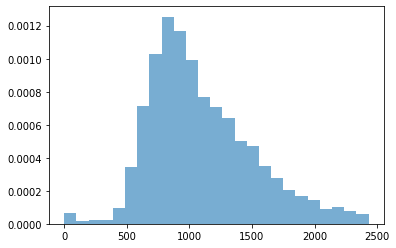

In [ ]:
cal_pop=apart_house[apart_house['type']=='apartment']
from scipy.stats import norm
# Fit a normal distribution to the data:
mu, std = norm.fit(cal_pop['price'])

# Plot the histogram.
plt.hist(cal_pop['price'], bins=25, density=True, alpha=0.6,)

(array([2.92426244e-05, 6.68402843e-06, 1.08615462e-05, 1.83810782e-05,
        7.85373341e-05, 3.19997861e-04, 4.37803862e-04, 8.85633767e-04,
        9.94249229e-04, 1.26996540e-03, 8.67252689e-04, 6.78428886e-04,
        8.00412405e-04, 5.89865509e-04, 5.79003963e-04, 6.39160219e-04,
        4.83756558e-04, 4.51171919e-04, 3.49240485e-04, 2.11382399e-04,
        2.40625023e-04, 9.10698874e-05, 1.16134994e-04, 8.68923696e-05,
        7.35243127e-05]),
 array([   0.,   97.,  194.,  291.,  388.,  485.,  582.,  679.,  776.,
         873.,  970., 1067., 1164., 1261., 1358., 1455., 1552., 1649.,
        1746., 1843., 1940., 2037., 2134., 2231., 2328., 2425.]),
 <a list of 25 Patch objects>)

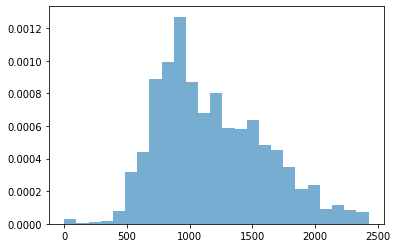

In [ ]:
Tex_pop=apart_house[apart_house['type']=='house']
from scipy.stats import norm
# Fit a normal distribution to the data:
mu, std = norm.fit(cal_pop['price'])

# Plot the histogram.
plt.hist(Tex_pop['price'], bins=25, density=True, alpha=0.6,)

**Stratified Sampling** 

This technique will enable us obtain a sample population that best represents the entire population by dividing it into strata.in this case our strata would be the States.

In [ ]:
strat_output=apart_house.groupby(['state']).apply(lambda subset: subset.sample(frac=0.1))
strat_output['state'].count()

18807

with a fraction of 0.1 we have a sample size of 18,807 entries

**checking for the distributions for samples**

(array([6.92697698e-05, 1.52628306e-05, 1.58498626e-05, 1.99590862e-05,
        9.15769838e-05, 3.30498987e-04, 7.19114136e-04, 1.08013878e-03,
        1.17876015e-03, 1.24450773e-03, 9.56862075e-04, 7.54923085e-04,
        7.16178976e-04, 6.36342631e-04, 5.13065922e-04, 4.60820079e-04,
        3.59263552e-04, 2.50662642e-04, 2.34812779e-04, 1.63194881e-04,
        1.45583923e-04, 9.86213672e-05, 8.39455685e-05, 8.80547922e-05,
        6.92697698e-05]),
 array([   0.  ,   97.12,  194.24,  291.36,  388.48,  485.6 ,  582.72,
         679.84,  776.96,  874.08,  971.2 , 1068.32, 1165.44, 1262.56,
        1359.68, 1456.8 , 1553.92, 1651.04, 1748.16, 1845.28, 1942.4 ,
        2039.52, 2136.64, 2233.76, 2330.88, 2428.  ]),
 <a list of 25 Patch objects>)

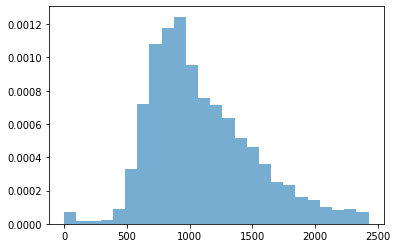

In [ ]:
apartment_sample=strat_output[strat_output['type']=='apartment']
from scipy.stats import norm
# Fit a normal distribution to the data:
mu, std = norm.fit(apartment_sample['price'])

# Plot the histogram.
plt.hist(apartment_sample['price'], bins=25, density=True, alpha=0.6,)

(array([3.28860826e-05, 8.22152065e-06, 1.64430413e-05, 1.64430413e-05,
        6.57721652e-05, 2.38424099e-04, 4.19297553e-04, 8.30373586e-04,
        1.17567745e-03, 1.29900026e-03, 8.87924230e-04, 7.48158379e-04,
        6.65943173e-04, 6.49500132e-04, 6.24835570e-04, 6.82386214e-04,
        4.43962115e-04, 6.08392528e-04, 3.12417785e-04, 2.21981058e-04,
        1.80873454e-04, 4.93291239e-05, 9.04367272e-05, 9.04367272e-05,
        5.75506446e-05]),
 array([   0.,   96.,  192.,  288.,  384.,  480.,  576.,  672.,  768.,
         864.,  960., 1056., 1152., 1248., 1344., 1440., 1536., 1632.,
        1728., 1824., 1920., 2016., 2112., 2208., 2304., 2400.]),
 <a list of 25 Patch objects>)

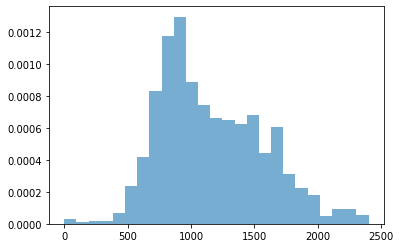

In [ ]:
house_sample=strat_output[strat_output['type']=='house']
from scipy.stats import norm
# Fit a normal distribution to the data:
mu, std = norm.fit(house_sample['price'])

# Plot the histogram.
plt.hist(house_sample['price'], bins=25, density=True, alpha=0.6,)

# 8.0 Hypothesis Testing

## a. Stating the hypothesis

From our analysis, the most popular type of house to live in an apartment followed by a house


Ho: There is no significant difference in the average price of an apartment and a house 

H1:The average price of an apartment is significatnly lower than that of a house (claim)

Ho:μ1-μ2=0

vs.

H1:μ1-μ2 < 0 (claim)

where

 μ1 is the average price of an apartment and

μ2 is the average price of a house 

* Our hypothesis will be a left tailed test


we decided to set the level of significance at alpha(α)=0.05

## b. Calculating the test statistic

sample means for the two samples


In [ ]:
mean_apartment=strat_output[strat_output['type']=='apartment']['price'].mean()

In [ ]:
mean_house=strat_output[strat_output['type']=='house']['price'].mean()

population standard deviations for two samples

In [ ]:
std_apart=apart_house[apart_house['type']=='apartment']['price'].std()


In [ ]:
std_house=apart_house[apart_house['type']=='house']['price'].std()


population variances

In [ ]:
var_apart=std_apart**2
var_house=std_house**2

sample sizes

In [ ]:
n_apartment=strat_output[strat_output['type']=='apartment']['price'].shape[0]
n_apartment

17540

In [ ]:
n_house=strat_output[strat_output['type']=='house']['price'].shape[0]
n_house

1267

calculating the actual z-score

In [ ]:
zscore=((mean_apartment-mean_house))/(((var_apart/n_apartment)+(var_house/n_house))**(1/2))

In [ ]:
zscore

-5.190184913226682

**Using the p-value approach**

In [ ]:
import scipy.stats

#find p-value for one-tailed test
scipy.stats.norm.sf(abs(zscore))


1.0504267170210309e-07

## c.Decision

Since the pvalue< α  ie. 1.050e-07 < 0.05, then we reject the null hypothesis that there is no significant difference in the average price of an apartment and a house

## d. Conclusion

At the α = 0.05 level of significance, there is enough evidence to conclude
that the average price of an apartment is significatnly lower than that of a house.